# **Importing_essenial_libraries**

In [ ]:
import pandas as pd
from datetime import timedelta
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score
import matplotlib.pyplot as plt
from sklearn import metrics

# **Train_Data**

In [ ]:
# read train data
df = pd.read_parquet('train.parquet', engine='auto')
df

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


In [ ]:
# count of patients
s = len(df['Patient-Uid'].unique())
print('Number of patients:', s)

Number of patients: 27033


In [ ]:
# Group by 'GroupColumn' and sort each group by 'ValueColumn' in descending order
sorted_df = df.groupby('Patient-Uid', group_keys=False).apply(lambda x: x.sort_values(by='Date', ascending=False))
sorted_df

,Patient-Uid,Date,Incident
3202906,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-09,DRUG_TYPE_2
1917285,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-07,DRUG_TYPE_2
948750,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-05,DRUG_TYPE_7
2712526,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-05,DRUG_TYPE_2
595085,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-04,DRUG_TYPE_7
...,...,...,...
13222187,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2015-08-06,TEST_TYPE_1
20630372,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2015-07-16,DRUG_TYPE_6
22527539,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2015-07-16,DRUG_TYPE_5
19365755,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2015-06-26,DRUG_TYPE_1


In [ ]:
sorted_df.head(20)

,Patient-Uid,Date,Incident
3202906,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-09,DRUG_TYPE_2
1917285,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-07,DRUG_TYPE_2
948750,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-05,DRUG_TYPE_7
2712526,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-05,DRUG_TYPE_2
595085,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-04,DRUG_TYPE_7
653465,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-04,PRIMARY_DIAGNOSIS
646431,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-04,TEST_TYPE_1
26810,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-04,DRUG_TYPE_2
1497523,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-03,PRIMARY_DIAGNOSIS
3100536,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-03,SYMPTOM_TYPE_0


In [ ]:
# check for null values
sorted_df.isnull().sum()

Patient-Uid    0
Date           0
Incident       0
dtype: int64

In [ ]:
# check for duplicates
sorted_df.duplicated().sum()

35571

The presence of 35571 duplicates will result in varying results, so it is best to remove these duplicates

In [ ]:
# remove duplicates
sorted_df = sorted_df.drop_duplicates()

In [ ]:
# crosscheck for duplicates after removing
sorted_df.duplicated().sum()

0

In [ ]:
# Find the earliest 'target drug' date for each 'ID'
earliest_target_dates = sorted_df[sorted_df['Incident'] == 'TARGET DRUG'].groupby('Patient-Uid')['Date'].min().reset_index()
earliest_target_dates.rename(columns={'Date': 'earliest_target_date'}, inplace=True)
earliest_target_dates

,Patient-Uid,earliest_target_date
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-07-08
1,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-04-24
2,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,2019-10-31
3,a0e9c414-1c7c-11ec-889a-16262ee38c7f,2018-04-05
4,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,2019-09-10
...,...,...
9369,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,2020-06-16
9370,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,2020-07-18
9371,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2020-05-21
9372,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,2020-07-21


In [ ]:
target_df = sorted_df[sorted_df['Incident']=='TARGET DRUG']
target_df

,Patient-Uid,Date,Incident
11867225,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-09-02,TARGET DRUG
5863940,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-08-05,TARGET DRUG
12336688,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-07-08,TARGET DRUG
25403389,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2019-10-29,TARGET DRUG
17267014,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2019-08-30,TARGET DRUG
...,...,...,...
22578676,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2020-05-21,TARGET DRUG
23461148,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,2020-07-21,TARGET DRUG
14145873,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-08-05,TARGET DRUG
27737944,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,TARGET DRUG


In [ ]:
features_df = sorted_df[sorted_df['Incident']!='TARGET DRUG']
features_df

,Patient-Uid,Date,Incident
3202906,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-09,DRUG_TYPE_2
1917285,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-07,DRUG_TYPE_2
948750,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-05,DRUG_TYPE_7
2712526,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-05,DRUG_TYPE_2
595085,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-04,DRUG_TYPE_7
...,...,...,...
13222187,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2015-08-06,TEST_TYPE_1
20630372,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2015-07-16,DRUG_TYPE_6
22527539,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2015-07-16,DRUG_TYPE_5
19365755,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2015-06-26,DRUG_TYPE_1


In [ ]:
# Merge the earliest 'target drug' dates with the original DataFrame
features_df = features_df.merge(earliest_target_dates, on='Patient-Uid', how='left')
features_df

,Patient-Uid,Date,Incident,earliest_target_date
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-09,DRUG_TYPE_2,NaT
1,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-07,DRUG_TYPE_2,NaT
2,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-05,DRUG_TYPE_7,NaT
3,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-05,DRUG_TYPE_2,NaT
4,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-04,DRUG_TYPE_7,NaT
...,...,...,...,...
3118074,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2015-08-06,TEST_TYPE_1,2020-06-18
3118075,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2015-07-16,DRUG_TYPE_6,2020-06-18
3118076,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2015-07-16,DRUG_TYPE_5,2020-06-18
3118077,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2015-06-26,DRUG_TYPE_1,2020-06-18


In [ ]:
# Subtract 30 days from 'earliest_target_date'
features_df['earliest_target_date'] = features_df['earliest_target_date'] - timedelta(days=30)

In [ ]:
# Filter rows where 'date' is less than 'earliest_target_date' and ignore 'NaT'
filtered_df = features_df[(features_df['Date'] <= features_df['earliest_target_date']) | (features_df['earliest_target_date'].isnull())]
filtered_df

,Patient-Uid,Date,Incident,earliest_target_date
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-09,DRUG_TYPE_2,NaT
1,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-07,DRUG_TYPE_2,NaT
2,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-05,DRUG_TYPE_7,NaT
3,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-05,DRUG_TYPE_2,NaT
4,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2020-08-04,DRUG_TYPE_7,NaT
...,...,...,...,...
3118074,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2015-08-06,TEST_TYPE_1,2020-05-19
3118075,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2015-07-16,DRUG_TYPE_6,2020-05-19
3118076,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2015-07-16,DRUG_TYPE_5,2020-05-19
3118077,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2015-06-26,DRUG_TYPE_1,2020-05-19


In [ ]:
filtered_df['Incident'].unique()

array(['DRUG_TYPE_2', 'DRUG_TYPE_7', 'PRIMARY_DIAGNOSIS', 'TEST_TYPE_1',
       'SYMPTOM_TYPE_0', 'TEST_TYPE_0', 'DRUG_TYPE_0', 'DRUG_TYPE_6',
       'DRUG_TYPE_8', 'SYMPTOM_TYPE_2', 'SYMPTOM_TYPE_7', 'DRUG_TYPE_11',
       'DRUG_TYPE_9', 'DRUG_TYPE_1', 'DRUG_TYPE_3', 'SYMPTOM_TYPE_17',
       'SYMPTOM_TYPE_6', 'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_15',
       'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_8', 'TEST_TYPE_2', 'TEST_TYPE_4',
       'SYMPTOM_TYPE_24', 'SYMPTOM_TYPE_4', 'DRUG_TYPE_10', 'DRUG_TYPE_5',
       'SYMPTOM_TYPE_9', 'SYMPTOM_TYPE_1', 'DRUG_TYPE_15',
       'SYMPTOM_TYPE_5', 'TEST_TYPE_3', 'DRUG_TYPE_12', 'DRUG_TYPE_4',
       'DRUG_TYPE_14', 'SYMPTOM_TYPE_16', 'DRUG_TYPE_13',
       'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_18', 'SYMPTOM_TYPE_13',
       'SYMPTOM_TYPE_29', 'SYMPTOM_TYPE_11', 'SYMPTOM_TYPE_12',
       'SYMPTOM_TYPE_22', 'SYMPTOM_TYPE_19', 'DRUG_TYPE_16',
       'DRUG_TYPE_17', 'SYMPTOM_TYPE_21', 'TEST_TYPE_5',
       'SYMPTOM_TYPE_20', 'SYMPTOM_TYPE_26', 'SYMPTOM_TYPE_27',
   

In [ ]:
sorted_df['Incident'].unique()

array(['DRUG_TYPE_2', 'DRUG_TYPE_7', 'PRIMARY_DIAGNOSIS', 'TEST_TYPE_1',
       'SYMPTOM_TYPE_0', 'TEST_TYPE_0', 'DRUG_TYPE_0', 'DRUG_TYPE_6',
       'DRUG_TYPE_8', 'SYMPTOM_TYPE_2', 'SYMPTOM_TYPE_7', 'DRUG_TYPE_11',
       'DRUG_TYPE_9', 'DRUG_TYPE_1', 'DRUG_TYPE_3', 'SYMPTOM_TYPE_17',
       'SYMPTOM_TYPE_6', 'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_15',
       'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_8', 'TEST_TYPE_2', 'TEST_TYPE_4',
       'SYMPTOM_TYPE_24', 'SYMPTOM_TYPE_4', 'DRUG_TYPE_10', 'DRUG_TYPE_5',
       'SYMPTOM_TYPE_9', 'SYMPTOM_TYPE_1', 'DRUG_TYPE_15',
       'SYMPTOM_TYPE_5', 'TEST_TYPE_3', 'DRUG_TYPE_12', 'DRUG_TYPE_4',
       'DRUG_TYPE_14', 'SYMPTOM_TYPE_16', 'DRUG_TYPE_13',
       'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_18', 'SYMPTOM_TYPE_13',
       'SYMPTOM_TYPE_29', 'SYMPTOM_TYPE_11', 'SYMPTOM_TYPE_12',
       'SYMPTOM_TYPE_22', 'SYMPTOM_TYPE_19', 'DRUG_TYPE_16',
       'DRUG_TYPE_17', 'SYMPTOM_TYPE_21', 'TEST_TYPE_5',
       'SYMPTOM_TYPE_20', 'SYMPTOM_TYPE_26', 'SYMPTOM_TYPE_27',
   

In [ ]:
# Group by 'Patient-Uid' and calculate the number of days between max and min dates
date_diff_df = filtered_df.groupby('Patient-Uid')['Date'].agg(['min', 'max']).reset_index()
date_diff_df['Date_Diff'] = (date_diff_df['max'] - date_diff_df['min']).dt.days
date_diff_df

,Patient-Uid,min,max,Date_Diff
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2015-09-22,2020-08-09,1783
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-04-10,2020-03-29,1815
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2015-04-08,2019-04-05,1458
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,2020-07-10,1906
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2015-04-14,2020-08-12,1947
...,...,...,...,...
27027,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,2015-04-18,2020-05-10,1849
27028,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,2015-07-01,2020-04-02,1737
27029,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2015-04-07,2020-03-18,1807
27030,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,2015-05-17,2020-06-06,1847


In [ ]:
date_diff_df = date_diff_df.drop(['min','max'], axis = 1)
date_diff_df

,Patient-Uid,Date_Diff
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,1783
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,1815
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,1458
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,1906
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,1947
...,...,...
27027,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,1849
27028,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,1737
27029,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,1807
27030,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,1847


In [ ]:
Target_drug_date_df = filtered_df.groupby('Patient-Uid')['earliest_target_date'].max().reset_index()

In [ ]:
# Pivot the DataFrame to create separate columns for each drug and count occurrences
pivot_df = filtered_df.pivot_table(index='Patient-Uid', columns='Incident', aggfunc='size', fill_value=0).reset_index()
pivot_df

Incident,Patient-Uid,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,...,SYMPTOM_TYPE_6,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,29,0,0,1,0,0,0,0,0,...,0,1,0,0,10,2,0,0,0,0
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,8,27,0,0,0,0,0,0,0,...,2,0,0,0,1,4,0,0,0,0
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,6,7,0,10,0,0,0,0,0,...,8,0,0,0,3,2,0,0,0,0
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,15,42,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2,45,0,24,0,0,0,0,0,...,6,5,6,0,9,27,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27027,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,38,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27028,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,16,22,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27029,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,6,48,0,3,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
27030,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,7,44,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# Merge the latest date with the pivot table
result_df = pivot_df.merge(date_diff_df, on='Patient-Uid').merge(Target_drug_date_df, on='Patient-Uid')
result_df

,Patient-Uid,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,...,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5,Date_Diff,earliest_target_date
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,29,0,0,1,0,0,0,0,0,...,0,0,10,2,0,0,0,0,1783,NaT
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,8,27,0,0,0,0,0,0,0,...,0,0,1,4,0,0,0,0,1815,NaT
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,6,7,0,10,0,0,0,0,0,...,0,0,3,2,0,0,0,0,1458,NaT
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,15,42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1906,NaT
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2,45,0,24,0,0,0,0,0,...,6,0,9,27,1,0,0,0,1947,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27027,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,38,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1849,2020-05-17
27028,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,16,22,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1737,2020-06-18
27029,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,6,48,0,3,0,0,0,0,0,...,0,0,0,2,0,0,0,0,1807,2020-04-21
27030,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,7,44,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1847,2020-06-21


In [ ]:
# Replace 'NaT' in 'earliest_target_date' with 0, and replace valid dates with 1
result_df['earliest_target_date'] = result_df['earliest_target_date'].notnull().astype(int)

# Rename the 'earliest_target_date' column to 'Target_drug'
result_df.rename(columns={'earliest_target_date': 'Target_drug'}, inplace=True)


result_df

,Patient-Uid,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,...,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5,Date_Diff,Target_drug
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,29,0,0,1,0,0,0,0,0,...,0,0,10,2,0,0,0,0,1783,0
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,8,27,0,0,0,0,0,0,0,...,0,0,1,4,0,0,0,0,1815,0
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,6,7,0,10,0,0,0,0,0,...,0,0,3,2,0,0,0,0,1458,0
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,15,42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1906,0
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2,45,0,24,0,0,0,0,0,...,6,0,9,27,1,0,0,0,1947,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27027,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,38,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1849,1
27028,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,16,22,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1737,1
27029,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,6,48,0,3,0,0,0,0,0,...,0,0,0,2,0,0,0,0,1807,1
27030,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,7,44,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1847,1


In [ ]:
X = result_df.drop(['Target_drug', 'Patient-Uid'], axis=1)
y = result_df['Target_drug']

In [ ]:
X

,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,DRUG_TYPE_17,...,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5,Date_Diff
0,29,0,0,1,0,0,0,0,0,0,...,1,0,0,10,2,0,0,0,0,1783
1,8,27,0,0,0,0,0,0,0,0,...,0,0,0,1,4,0,0,0,0,1815
2,6,7,0,10,0,0,0,0,0,0,...,0,0,0,3,2,0,0,0,0,1458
3,15,42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1906
4,2,45,0,24,0,0,0,0,0,0,...,5,6,0,9,27,1,0,0,0,1947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27027,38,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1849
27028,16,22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1737
27029,6,48,0,3,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1807
27030,7,44,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1847


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
27027    1
27028    1
27029    1
27030    1
27031    1
Name: Target_drug, Length: 27032, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculate and print classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3526
           1       0.88      0.89      0.88      1881

    accuracy                           0.92      5407
   macro avg       0.91      0.91      0.91      5407
weighted avg       0.92      0.92      0.92      5407



In [ ]:
# Calculate the F1 score
f1 = f1_score(y_test, y_pred)

print(f"F1 Score: {f1:.2f}")

F1 Score: 0.88


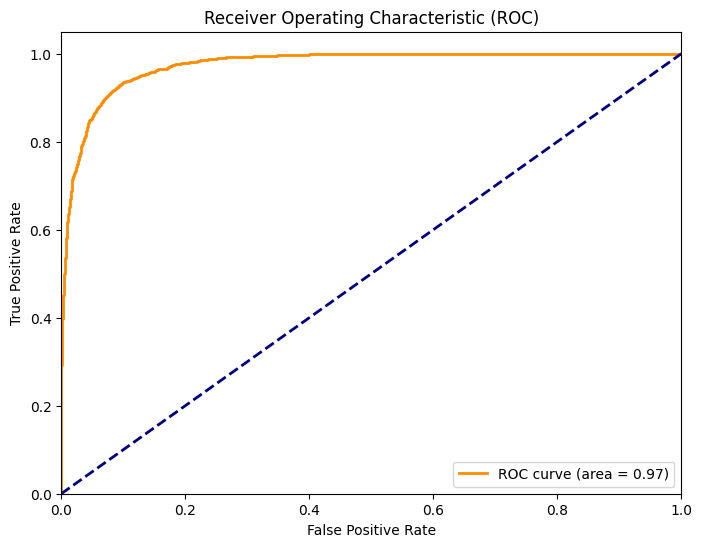

In [ ]:
# Get the probability estimates for the positive class
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC-AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

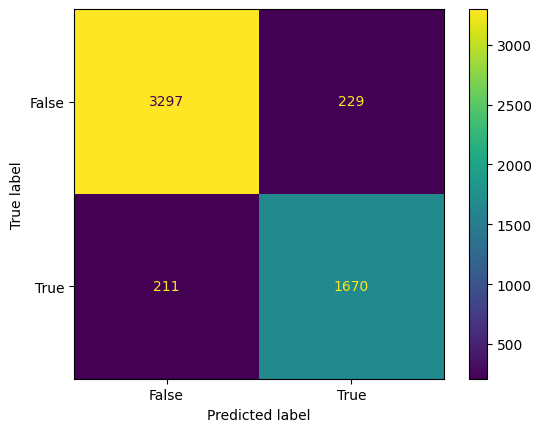

In [ ]:
# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

confusion_matrix_plot = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = [False, True])

confusion_matrix_plot.plot()
plt.show()

**From the XGBoost Classifier model we got the metrics as follows**


1.   **F1 Score - 0.88**
2.   **Accuracy - 0.92**
3.   **ROC curve(Area = 0.97)**

#**Test_Data**

In [ ]:
# read test data
test_df = pd.read_parquet('test.parquet', engine='auto')
test_df

,Patient-Uid,Date,Incident
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-10-17,DRUG_TYPE_0
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,DRUG_TYPE_2
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,DRUG_TYPE_1
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-11-04,SYMPTOM_TYPE_0
...,...,...,...
1372854,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-05-11,DRUG_TYPE_13
1372856,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2018-08-22,DRUG_TYPE_2
1372857,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-02-04,DRUG_TYPE_2
1372858,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2017-09-25,DRUG_TYPE_8


In [ ]:
# Group by 'GroupColumn' and sort each group by 'ValueColumn' in descending order
test_sorted_df = test_df.groupby('Patient-Uid', group_keys=False).apply(lambda x: x.sort_values(by='Date', ascending=False))
test_sorted_df

,Patient-Uid,Date,Incident
9,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2019-05-21,DRUG_TYPE_0
48,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2019-04-03,DRUG_TYPE_0
56,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2019-01-29,DRUG_TYPE_1
28,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2019-01-02,DRUG_TYPE_1
52,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,PRIMARY_DIAGNOSIS
...,...,...,...
1372842,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2015-05-17,DRUG_TYPE_5
1372691,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2015-05-08,DRUG_TYPE_9
1372787,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2015-05-01,DRUG_TYPE_2
1372685,a10272c9-1c7c-11ec-b3ce-16262ee38c7f,2015-04-14,DRUG_TYPE_7


In [ ]:
# chaeck for null values
test_df.isnull().sum()

Patient-Uid    0
Date           0
Incident       0
dtype: int64

In [ ]:
# check for duplicates
test_df.duplicated().sum()

12100

In [ ]:
# remove duplicates
test_df = test_df.drop_duplicates()
test_df.duplicated().sum()

0

In [ ]:
# unique incidents
test_df["Incident"].unique()

array(['SYMPTOM_TYPE_0', 'DRUG_TYPE_0', 'DRUG_TYPE_2', 'DRUG_TYPE_1',
       'PRIMARY_DIAGNOSIS', 'DRUG_TYPE_8', 'TEST_TYPE_0', 'DRUG_TYPE_7',
       'DRUG_TYPE_11', 'SYMPTOM_TYPE_6', 'DRUG_TYPE_5', 'DRUG_TYPE_6',
       'DRUG_TYPE_9', 'DRUG_TYPE_15', 'TEST_TYPE_3', 'SYMPTOM_TYPE_3',
       'TEST_TYPE_1', 'DRUG_TYPE_3', 'TEST_TYPE_2', 'SYMPTOM_TYPE_7',
       'DRUG_TYPE_12', 'SYMPTOM_TYPE_2', 'SYMPTOM_TYPE_10',
       'SYMPTOM_TYPE_1', 'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_18',
       'SYMPTOM_TYPE_5', 'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_9',
       'SYMPTOM_TYPE_4', 'SYMPTOM_TYPE_8', 'SYMPTOM_TYPE_29',
       'DRUG_TYPE_13', 'SYMPTOM_TYPE_21', 'DRUG_TYPE_4',
       'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_11', 'SYMPTOM_TYPE_19',
       'DRUG_TYPE_14', 'SYMPTOM_TYPE_16', 'TEST_TYPE_4', 'DRUG_TYPE_10',
       'SYMPTOM_TYPE_26', 'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_24',
       'DRUG_TYPE_16', 'SYMPTOM_TYPE_13', 'TEST_TYPE_5',
       'SYMPTOM_TYPE_20', 'SYMPTOM_TYPE_25', 'SYMPTOM_TYPE_22',
       'DRUG_TYPE_1

In [ ]:
# check for target drug incident
test_target = test_df[test_df['Incident']=='TARGET DRUG']
test_target

,Patient-Uid,Date,Incident


In [ ]:
# Group by 'Patient-Uid' and calculate the number of days between max and min dates
test_date_diff_df = test_df.groupby('Patient-Uid')['Date'].agg(['min', 'max']).reset_index()
test_date_diff_df['Date_Diff'] = (test_date_diff_df['max'] - test_date_diff_df['min']).dt.days
test_date_diff_df

,Patient-Uid,min,max,Date_Diff
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-06-23,2019-05-21,1062
1,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,2015-04-17,2019-10-23,1650
2,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,2015-04-09,2019-10-21,1656
3,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,2015-04-14,2020-03-21,1803
4,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,2015-10-21,2019-11-09,1480
...,...,...,...,...
11477,a102720c-1c7c-11ec-bd9a-16262ee38c7f,2015-04-10,2020-03-24,1810
11478,a102723c-1c7c-11ec-9f80-16262ee38c7f,2015-05-27,2019-07-06,1501
11479,a102726b-1c7c-11ec-bfbf-16262ee38c7f,2015-05-25,2020-01-02,1683
11480,a102729b-1c7c-11ec-86ba-16262ee38c7f,2017-11-13,2019-04-21,524


In [ ]:
# remove minimum and maximum dates
test_date_diff_df = test_date_diff_df.drop(['min','max'], axis= 1)
test_date_diff_df

,Patient-Uid,Date_Diff
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,1062
1,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,1650
2,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,1656
3,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,1803
4,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,1480
...,...,...
11477,a102720c-1c7c-11ec-bd9a-16262ee38c7f,1810
11478,a102723c-1c7c-11ec-9f80-16262ee38c7f,1501
11479,a102726b-1c7c-11ec-bfbf-16262ee38c7f,1683
11480,a102729b-1c7c-11ec-86ba-16262ee38c7f,524


In [ ]:
# Pivot the DataFrame to create separate columns for each drug and count occurrences
test_pivot_df = test_df.pivot_table(index='Patient-Uid', columns='Incident', aggfunc='size', fill_value=0).reset_index()
test_pivot_df

Incident,Patient-Uid,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,...,SYMPTOM_TYPE_6,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,8,3,0,1,0,0,0,0,0,...,3,0,0,0,2,0,0,0,0,0
1,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,2,30,0,0,0,0,0,9,0,...,2,0,0,0,0,0,0,1,0,0
2,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,4,33,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
3,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,2,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11477,a102720c-1c7c-11ec-bd9a-16262ee38c7f,33,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11478,a102723c-1c7c-11ec-9f80-16262ee38c7f,4,6,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11479,a102726b-1c7c-11ec-bfbf-16262ee38c7f,14,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11480,a102729b-1c7c-11ec-86ba-16262ee38c7f,5,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# merge dataframes
test_result_df = test_pivot_df.merge(test_date_diff_df, on= 'Patient-Uid')
test_result_df

,Patient-Uid,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,...,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5,Date_Diff
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,8,3,0,1,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,1062
1,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,2,30,0,0,0,0,0,9,0,...,0,0,0,0,0,0,1,0,0,1650
2,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,4,33,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1656
3,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,2,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1803
4,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11477,a102720c-1c7c-11ec-bd9a-16262ee38c7f,33,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1810
11478,a102723c-1c7c-11ec-9f80-16262ee38c7f,4,6,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1501
11479,a102726b-1c7c-11ec-bfbf-16262ee38c7f,14,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1683
11480,a102729b-1c7c-11ec-86ba-16262ee38c7f,5,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,524


In [ ]:
# get patient ids on separate dataframe
test_patientid_df = test_result_df['Patient-Uid']
test_patientid_df

0        a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f
1        a0f9e9f9-1c7c-11ec-b565-16262ee38c7f
2        a0f9ea43-1c7c-11ec-aa10-16262ee38c7f
3        a0f9ea7c-1c7c-11ec-af15-16262ee38c7f
4        a0f9eab1-1c7c-11ec-a732-16262ee38c7f
                         ...                 
11477    a102720c-1c7c-11ec-bd9a-16262ee38c7f
11478    a102723c-1c7c-11ec-9f80-16262ee38c7f
11479    a102726b-1c7c-11ec-bfbf-16262ee38c7f
11480    a102729b-1c7c-11ec-86ba-16262ee38c7f
11481    a10272c9-1c7c-11ec-b3ce-16262ee38c7f
Name: Patient-Uid, Length: 11482, dtype: object

In [ ]:
# dataframe to use in ML model
test_result_df = test_result_df.drop('Patient-Uid', axis= 1)
test_result_df

,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,DRUG_TYPE_17,...,SYMPTOM_TYPE_7,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5,Date_Diff
0,8,3,0,1,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,1062
1,2,30,0,0,0,0,0,9,0,0,...,0,0,0,0,0,0,1,0,0,1650
2,4,33,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1656
3,2,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1803
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11477,33,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1810
11478,4,6,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1501
11479,14,5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1683
11480,5,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,524


In [ ]:
# add dummy missing column
test_result_df['DRUG_TYPE_18'] = 0
test_result_df

,DRUG_TYPE_0,DRUG_TYPE_1,DRUG_TYPE_10,DRUG_TYPE_11,DRUG_TYPE_12,DRUG_TYPE_13,DRUG_TYPE_14,DRUG_TYPE_15,DRUG_TYPE_16,DRUG_TYPE_17,...,SYMPTOM_TYPE_8,SYMPTOM_TYPE_9,TEST_TYPE_0,TEST_TYPE_1,TEST_TYPE_2,TEST_TYPE_3,TEST_TYPE_4,TEST_TYPE_5,Date_Diff,DRUG_TYPE_18
0,8,3,0,1,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1062,0
1,2,30,0,0,0,0,0,9,0,0,...,0,0,0,0,0,1,0,0,1650,0
2,4,33,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,1656,0
3,2,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1803,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1480,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11477,33,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1810,0
11478,4,6,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1501,0
11479,14,5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1683,0
11480,5,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,524,0


In [ ]:
# Create a list of column names from the training data
train_columns = X.columns.tolist()

# Reorder the columns in the test data to match the order of the training data
test_result_df = test_result_df[train_columns]


In [ ]:
# predict for test data
test_pred = xgb_model.predict(test_result_df)
test_pred

array([0, 1, 0, ..., 1, 1, 1])

In [ ]:
#create final submission file
Final_submission = pd.DataFrame({'Patient-Uid': test_patientid_df, 'label': test_pred})
Final_submission

,Patient-Uid,label
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,0
1,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,1
2,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,0
3,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,0
4,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,0
...,...,...
11477,a102720c-1c7c-11ec-bd9a-16262ee38c7f,1
11478,a102723c-1c7c-11ec-9f80-16262ee38c7f,1
11479,a102726b-1c7c-11ec-bfbf-16262ee38c7f,1
11480,a102729b-1c7c-11ec-86ba-16262ee38c7f,1


In [ ]:
# save as Final_submission.csv
Final_submission.to_csv('Final_submission.csv', index = False)